# Python for Data Science Project Session 5: Economics and Finance

In this session, we will look at three mini projects related to Economics/Finance, applying techniques covered in Session Five and extending these a bit further. To start we will import our general data science packages here, and then add the necessary machine learning imports as we go along so that it's clear when we use what: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convergence warning disabling
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter

simplefilter("ignore", category=ConvergenceWarning)

## Classification: Which companies go bust?
Data set: Taiwan bankruptcy
- Pipeline
- PCA
- SMOTE
- Metrics
- KNN & Logistic regression

### Data set overview

In [2]:
# Read bankruptcy data set
data  = pd.read_csv('data/bankruptcy.csv')

In [3]:
# Output the first five rows
data.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [44]:
# Print the data set overview (dimensions, variable names, data types, null values)
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Columns: 96 entries, Bankrupt to  Equity to Liability
dtypes: float64(93), int64(3)
memory usage: 5.0 MB


### Dimensionality reduction

One problem that is immediately apparent is that we have a high number of features in our data. This constitutes a problem as capturing the complexities of a highly dimensional space through our model can lead us to **overfitting**. 
> This is known as the [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality#Machine_Learning) and is definitely a topic worth exploring further.

We will attempt to overcome this problem using several techniques but first, we must create our usual machine learning setup:

In [5]:
# Importing train-test split function
from sklearn.model_selection import train_test_split

In [6]:
# Declare the training vector y which has the column label 'Bankrupt'
y = data.Bankrupt

In [7]:
# Declare feature matrix 
X = data.drop(columns='Bankrupt')

In [8]:
# Create a train-test- split using random state 253, test_size 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=253)

In order to cope with the high dimensionality of our data we can employ several dimensionality reduction techniques. The first one we'll explore is called **Principal Component Analysis (PCA)** and for a more in-depth treatment of the subject be sure to refer [here](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c). PCA essentially works by projecting our data points (which can be seen as vectors) into a lower dimensional space while maximizing the conserved variance of our data.

To perform PCA:
- Import the `PCA` class from the `sklearn.decomposition` module.
- Decide on a number for `n_components`. This is going to be the new number of features.
- Create a PCA transformer.
- Train the transformer using the `.fit()` method.
- Apply dimensionality reduction using the `.transform()` method.

> **Note:** The `.tranfrom()` method will return a NumPy array as opposed to a pandas DataFrame.

Try out reducing our training feature matrix `X_train` below:

In [9]:
# Importing PCA class
from sklearn.decomposition import PCA

In [10]:
# Create PCA transformer that keeps 30 components 
pca = PCA(n_components=30)

In [11]:
# Fit and transform using our PCA model
pca.fit(X_train)
X_red = pca.transform(X_train)
pd.DataFrame(X_red).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.523242e+09,-1.918231e+09,-1.232079e+09,-1.776376e+09,-2.241226e+09,-2.137455e+09,-1.284218e+09,-4.522613e+08,-1.019373e+08,-5.526863e+07,...,5.990670e+08,-9.863251e+05,-1.488518e+06,0.021262,-0.388106,0.039451,-0.105008,-0.000646,0.046449,0.058511
1,-3.190167e+09,-2.229378e+09,-1.542280e+09,-1.132694e+09,-3.550784e+09,-9.206884e+08,4.735889e+09,-7.588887e+08,-1.324696e+08,-8.904601e+06,...,-5.230878e+06,-1.021334e+06,-1.433085e+06,-0.309381,-0.336137,-0.021758,-0.073707,-0.018794,-0.031770,0.026735
2,3.923038e+08,-1.977646e+09,2.672523e+09,-3.915985e+09,1.047293e+09,-3.084126e+09,-3.835881e+08,-1.973793e+08,-7.613600e+07,-3.861154e+07,...,-1.456694e+07,-4.647027e+05,-1.496466e+06,-0.373196,0.290911,-0.039027,0.134702,0.152492,-0.015098,0.055837
3,2.002011e+09,4.168241e+09,-1.769392e+09,9.539553e+08,-3.003403e+09,2.583991e+09,-1.937712e+09,-4.011079e+09,-1.151520e+07,-7.186522e+07,...,-1.115475e+07,-8.677484e+05,-1.694474e+05,-0.091082,-0.308277,0.126776,0.032384,0.124902,0.021414,-0.095183
4,-1.895548e+09,-2.092054e+09,-1.279104e+09,-5.940138e+08,9.752376e+08,-2.481735e+09,-6.981636e+08,-3.100633e+08,-9.929031e+07,-3.954471e+07,...,-1.818691e+07,-1.373497e+06,-1.614229e+06,-0.168585,-0.031901,-0.240894,-0.036218,0.024268,-0.071079,0.135636


### Pipelines

You might've noticed that most machine learning with scikit learn involves:
- Instantiating a transformer or model.
- Fitting this to our data using `.fit()`.
- Transforming or predicting using `.transform()` or `.predict()`.

This simple, general process is one of scikit learn's greatest features, and it means that we can simplify our ML process using **Pipelines**. A Pipeline allows you to 

In [12]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [13]:
# Importing KNN, SVM, and Logistic Regression models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.pipeline import Pipeline

In [32]:
# Combine these into three Pipelines, one for each model
knn_pipe = Pipeline([('Scaler', StandardScaler()), 
                     ('PCA', PCA()), 
                     ('Model', KNeighborsClassifier())])

svm_pipe = Pipeline([('Scaler', StandardScaler()), 
                     ('PCA', PCA()), 
                     ('Model', SVC())])

log_reg_pipe = Pipeline([('Scaler', StandardScaler()), 
                         ('PCA', PCA()), 
                         ('Model', LogisticRegression())])

### Alternative evaluation metrics

Introduce accuracy

In [20]:
from sklearn.model_selection import cross_val_score

In [27]:
knn_score = 100*cross_val_score(knn_pipe, X_train, y_train).mean()
svm_score = 100*cross_val_score(svm_pipe, X_train, y_train).mean()
log_reg_score = 100*cross_val_score(log_reg_pipe, X_train, y_train).mean()

In [28]:
print('KNN Accuracy Score:')
print(knn_score)

KNN Accuracy Score:
96.66877407883038


In [29]:
print('SVM Accuracy Score:')
print(svm_score)

SVM Accuracy Score:
96.77348612071522


In [30]:
print('Logistic Regression Accuracy Score:')
print(log_reg_score)

Logistic Regression Accuracy Score:
96.62686730986643


Shortfallings of accuracy:
>**Example:**
> Imagine if I told you I can build a machine learning model that predicts whether or not an applicant is admitted into Harvard with 96.4% accuracy. Sounds good right! Now what if I told you the model works by predicting `NOT_ACCEPTED` to every applicant, irrespective of any data. This works as Harvard has a 4.6% admissions rate, but is our model any good?  

Most often we care 

In [39]:
# Importing confusion matrix
from sklearn.metrics import confusion_matrix

In [40]:
# Create validation sample
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=253)

In [41]:
# Fit and predict KNN pipeline
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_val)
print('KNN Confusion Matrix:')
print(confusion_matrix(y_val, y_pred))

KNN Confusion Matrix:
[[734   6]
 [ 22   2]]


In [42]:
# Fit and predict SVM pipeline
svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict(X_val)
print('SVM Confusion Matrix:')
print(confusion_matrix(y_val, y_pred))

SVM Confusion Matrix:
[[740   0]
 [ 24   0]]


In [43]:
# Fit and predict KNN pipeline
log_reg_pipe.fit(X_train, y_train)
y_pred = log_reg_pipe.predict(X_val)
print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_val, y_pred))

Logistic Regression Confusion Matrix:
[[737   3]
 [ 18   6]]


Introduce classification report

In [33]:
# Importing confusion matrix
from sklearn.metrics import classification_report

In [35]:
# Fit and predict KNN pipeline
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_val)
print('KNN Classification Report:')
print(classification_report(y_val, y_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       920
           1       0.38      0.09      0.14        35

    accuracy                           0.96       955
   macro avg       0.67      0.54      0.56       955
weighted avg       0.94      0.96      0.95       955



In [36]:
# Fit and predict SVM pipeline
svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict(X_val)
print('SVM Classification Report:')
print(classification_report(y_val, y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       920
           1       1.00      0.03      0.06        35

    accuracy                           0.96       955
   macro avg       0.98      0.51      0.52       955
weighted avg       0.97      0.96      0.95       955



In [38]:
# Fit and predict KNN pipeline
log_reg_pipe.fit(X_train, y_train)
y_pred = log_reg_pipe.predict(X_val)
print('Logistic Regression Classification Report:')
print(classification_report(y_val, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       920
           1       0.36      0.14      0.20        35

    accuracy                           0.96       955
   macro avg       0.66      0.57      0.59       955
weighted avg       0.95      0.96      0.95       955



### Class Imbalance and Resampling

Introduce class imbalance

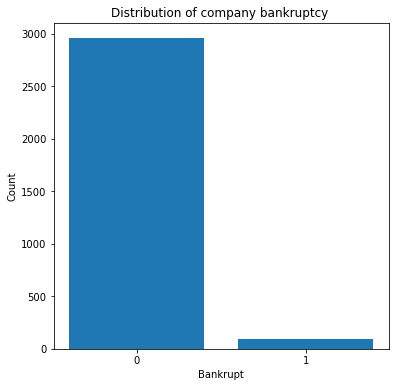

In [57]:
fig, ax = plt.subplots(figsize=(6, 6)) 
ax.bar([0,1],y_train.value_counts())
ax.set_xlabel('Bankrupt')
ax.set_ylabel('Count')
ax.set_xticks([0,1])
ax.set_title('Distribution of company bankruptcy ')
plt.show()

## Regression: 
Data set: 
- Pipelines
- Regularization
- Linear, ridge & SVC

## Unsupervised learning: 
Data set:
- Pipelines
- PCA
- Regularization
- Linear, ridge & SVC

First, lets start by reading in our data set into a pandas DataFrame and getting some info on its dimensions and composition:

From the above, we can see that our data has 